# Predicting Stock Prices with Linear Regression

Motivation/Intro

## Check out the Data

### Import Libraries

In [251]:
import numpy as np
import pandas as pd
import quandl
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)

### Configure Quandl

In [2]:
# Import API key from file
import API_config

In [3]:
quandl.ApiConfig.api_key = API_config.API_KEY

### Get the Data

In [4]:
# Set start and end date for stock prices
start_date = datetime.date(2009, 3,8)
end_date = datetime.date.today()
# Load data from Quandl
data = quandl.get('FSE/SAP_X', start_date=start_date, end_date=end_date)
# Save data to CSV file
data.to_csv('data/sap_stock.csv')

In [182]:
data.head()

,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
Date,,,,,,,,,,
2009-03-09,25.16,25.82,24.48,25.59,NaN,5749357.0,145200289.0,None,None,NaN
2009-03-10,25.68,26.95,25.68,26.87,NaN,7507770.0,198480965.0,None,None,NaN
2009-03-11,26.50,26.95,26.26,26.64,NaN,5855095.0,155815439.0,None,None,NaN
2009-03-12,26.15,26.47,25.82,26.18,NaN,6294955.0,164489409.0,None,None,NaN
2009-03-13,26.01,26.24,25.65,25.73,NaN,6814568.0,176228331.0,None,None,NaN


In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2550 entries, 2009-03-09 to 2019-03-08
Data columns (total 10 columns):
Open                     2242 non-null float64
High                     2543 non-null float64
Low                      2543 non-null float64
Close                    2550 non-null float64
Change                   11 non-null float64
Traded Volume            2504 non-null float64
Turnover                 2497 non-null float64
Last Price of the Day    0 non-null object
Daily Traded Units       0 non-null object
Daily Turnover           7 non-null float64
dtypes: float64(8), object(2)
memory usage: 219.1+ KB


In [184]:
data.describe()

,Open,High,Low,Close,Change,Traded Volume,Turnover,Daily Turnover
count,2242.000000,2543.000000,2543.000000,2550.000000,11.000000,2.504000e+03,2.497000e+03,7.0
mean,56.686896,61.563225,60.535073,60.995955,-0.070000,3.296818e+06,1.828440e+08,0.0
std,18.320821,21.184135,20.934460,21.097480,0.709761,2.004323e+06,9.350710e+07,0.0
min,25.160000,25.820000,24.480000,25.590000,-0.740000,0.000000e+00,1.767350e+05,0.0
25%,41.500000,43.430000,42.590000,42.950000,-0.500000,2.131686e+06,1.300462e+08,0.0
50%,56.560000,58.480000,57.580000,58.015000,-0.290000,2.852772e+06,1.626544e+08,0.0
75%,67.732500,78.365000,77.085000,77.762500,0.085000,3.878528e+06,2.104511e+08,0.0
max,100.100000,108.520000,107.020000,107.800000,1.250000,3.645671e+07,1.369431e+09,0.0


In [ ]:
data.columns

Select Subset with relevant features

In [5]:
# Create DataFrame with only closing price and date
df = pd.DataFrame(data, columns=['Close'])
# Reset index column so that date is proper column
df = df.reset_index()

In [6]:
df.head()

,Date,Close
0,2009-03-09,25.59
1,2009-03-10,26.87
2,2009-03-11,26.64
3,2009-03-12,26.18
4,2009-03-13,25.73


In [7]:
# Check data types in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 2 columns):
Date     2550 non-null datetime64[ns]
Close    2550 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 39.9 KB


In [176]:
# Check for missing values in relevant columns 
print(df['Close'].isna().sum())
print(df['Date'].isna().sum())

df.isna().values.any()

0
0


False

## Explore the Data

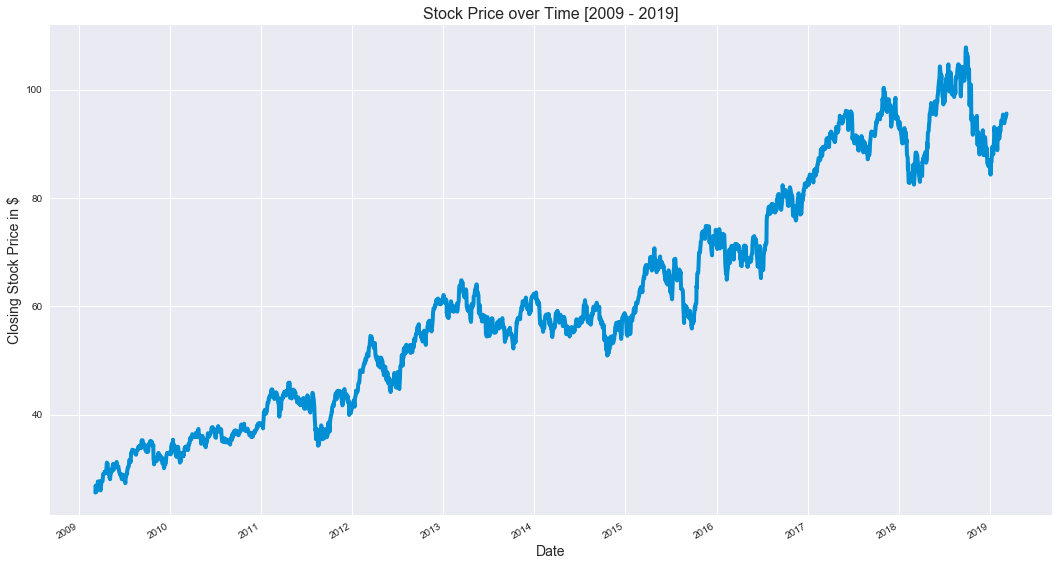

In [347]:
# Import matplotlib package for date plots
import matplotlib.dates as mdates

years = mdates.YearLocator() # Get every year
yearsFmt = mdates.DateFormatter('%Y') # Set year format

# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('Stock Price over Time [2009 - 2019]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

## Linear Regression

### Training a Linear Regression Model

#### X and Y arrays

### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [9]:
# Split data into train and test set: 80% / 20%
train, test = train_test_split(df, test_size=0.20)

### Create and Train the Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [12]:
# Reshape index column to 2D array for .fit() method
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

In [242]:
# Create LinearRegression Object
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Model Evaluation

In [243]:
# The coefficient
print('Coefficient: ', model.coef_)
# The Intercept
print('Intercept: ', model.intercept_)

Coefficient:  [0.02762424]
Intercept:  25.723432313963862


In [16]:
slope = np.asscalar(np.squeeze(model.coef_))
intercept = model.intercept_
print('slope: ', slope, 'intercept: ', intercept)

slope:  0.02762424028961455 intercept:  25.723432313963862


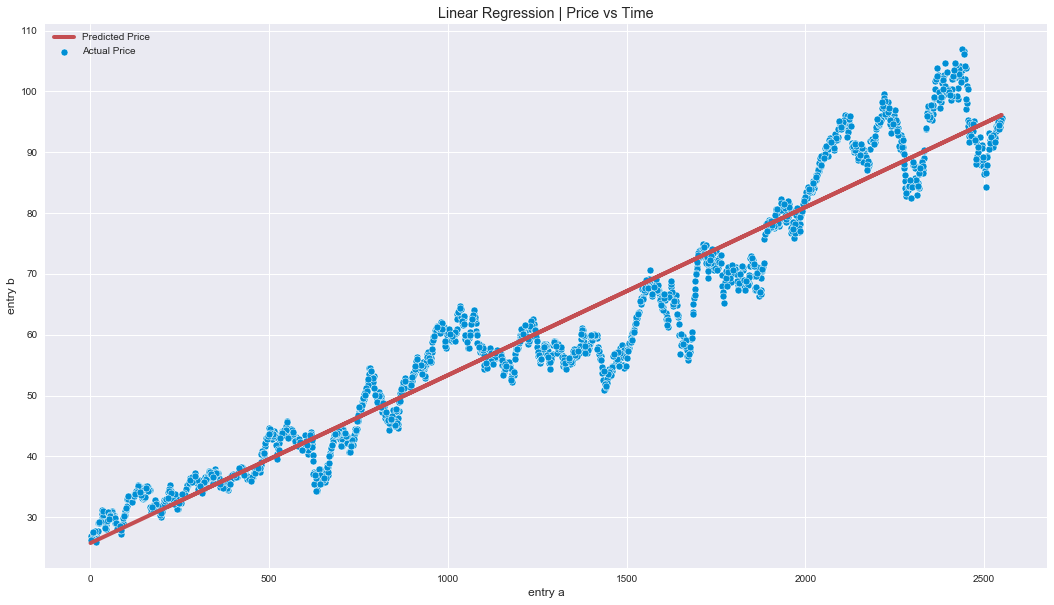

In [169]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

### Prediction from our Model

In [39]:
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']

In [63]:
y_pred = model.predict(X_test)

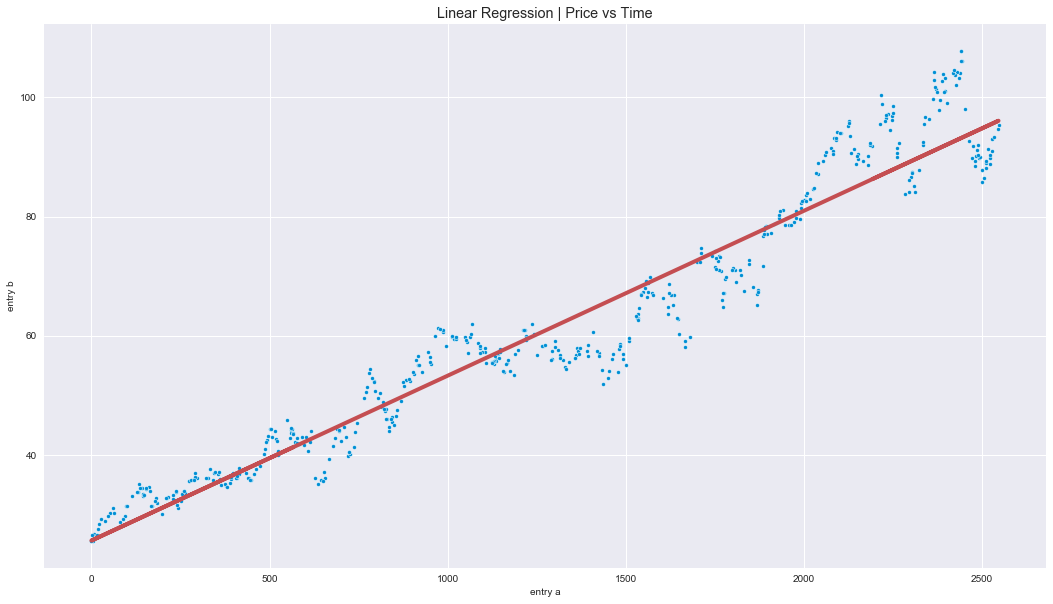

In [256]:
# Plot fitted line, y test
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.plot(X_test, model.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, edgecolor='w', label='Actual Price')

plt.xlabel('Integer Date')
plt.ylabel('Stock Price')

plt.show()

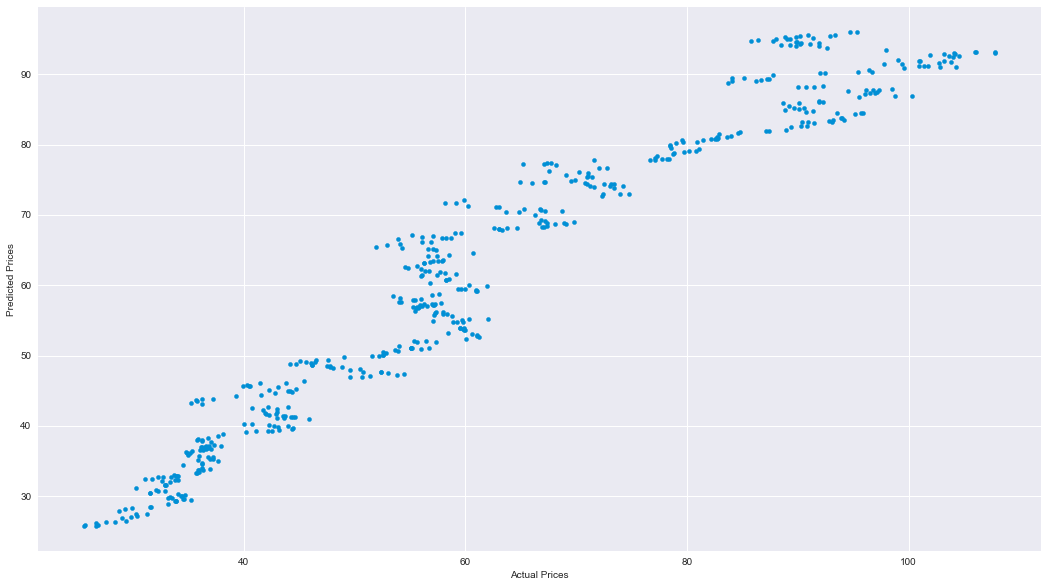

In [374]:
plt.scatter(y_test, y_pred)

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.show()

#### Residual Histogram

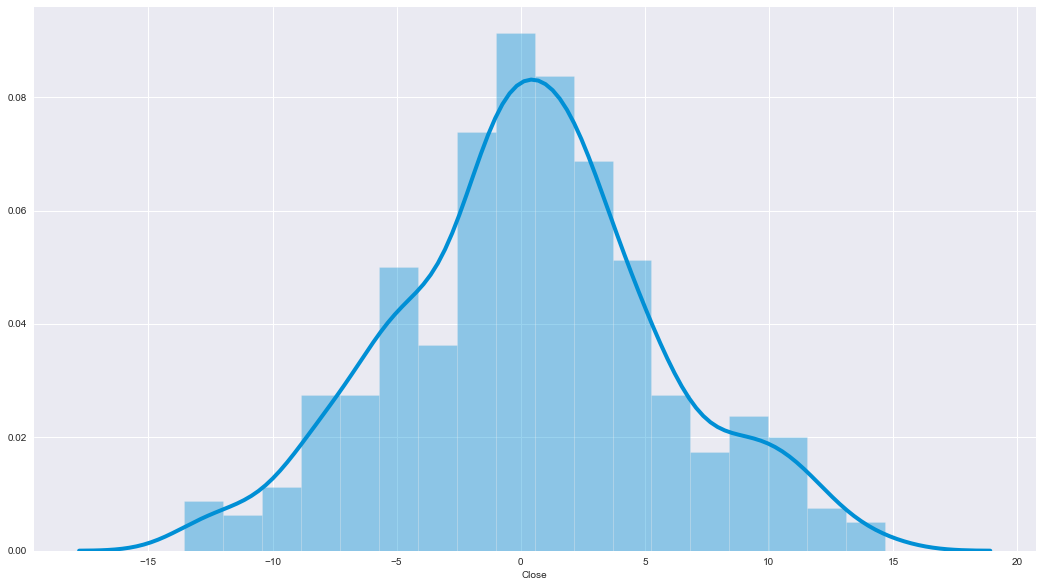

In [369]:
sns.distplot((y_test - y_pred))

plt.show()

In [266]:
# Add new column for predictions to df
df['Prediction'] = model.predict(np.array(df.index).reshape(-1, 1))

In [288]:
df.head()

,Date,Close,Prediction
0,2009-03-09,25.59,25.723432
1,2009-03-10,26.87,25.751057
2,2009-03-11,26.64,25.778681
3,2009-03-12,26.18,25.806305
4,2009-03-13,25.73,25.833929


In [366]:
# Select random sample from dataset
# Generate 25 random numbers
# Select row numbers == random numbers

df1 = df.head(25)

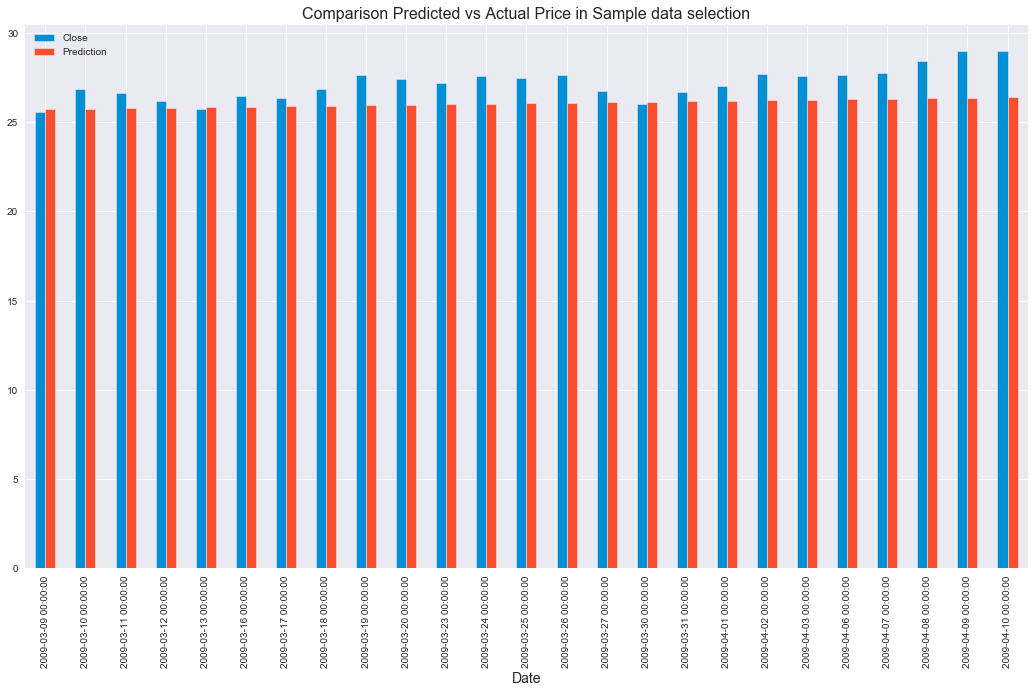

In [373]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
df1.plot(x='Date', y=['Close', 'Prediction'], kind='bar', ax=ax)

# Set figure title
plt.title('Comparison Predicted vs Actual Price in Sample data selection', fontsize=16)

# 

# Set x label
plt.xlabel('Date', fontsize=14)

# Show plot
plt.show()

In [ ]:
df1.head()

### Regression Evaluation Metrics

**Mean Absolute Error (MAE)**
$$
\frac{1}{N} \sum_{i = 1}^{N} |y_i - \hat{y}_i|
$$

**Mean Squared Error (MSE)**
$$
\frac{1}{N} \sum_{i = 1}^{N} (y_i - \hat{y}_i)^2
$$

**Root Mean Squared Error (RMSE)**
$$
\sqrt{\frac{1}{N} \sum_{i = 1}^{N} (y_i - \hat{y}_i)^2}
$$

In [72]:
from sklearn import metrics

In [73]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.172498876833842
Mean Squared Error: 28.76248048285447
Root Mean Squared Error: 5.3630663321326235


### Accuracy Evaluation Metrics

**Residual Sum of Squares (RSS)**
$$
RSS = \sum_{i = 1}^{N} \epsilon_i^2 = \sum_{i = 1}^{N} (y_i - \hat{y}_i)^2
$$

**Total Sum of Squares (TSS)**
$$
TSS = \sum_{i = 1}^{N} (y_i - \bar{y}_i)^2
$$
**Coefficient of determination**
$$
R^2 = 1 - \frac{RSS}{TSS}
$$

In [247]:
print('R2: ', metrics.r2_score(y_test, y_pred))

R2:  0.9395015859480149
